## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [3]:
# loading the training dataset
traindf = pd.read_csv('train_social.csv')
traindf.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


## EDA and Data Preprocessing

In [4]:
# overall infomartion of the data
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [5]:
# statistical summary of the data
traindf.describe()

,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


In [6]:
# getting rid of 'ID' column
traindf.drop('User_ID',axis=1,inplace=True)

In [7]:
# removing null values
traindf.dropna(inplace = True)

In [8]:
# checking and dropping rows with exactly similar values
traindf.duplicated().sum()

762

In [9]:
traindf.drop_duplicates(inplace=True)

In [10]:
traindf.head()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [11]:
traindf.columns

Index(['Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

### Let's analyze numerical columns

In [12]:
numerical_cols = ['Daily_Usage_Time (minutes)','Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
'Messages_Sent_Per_Day']

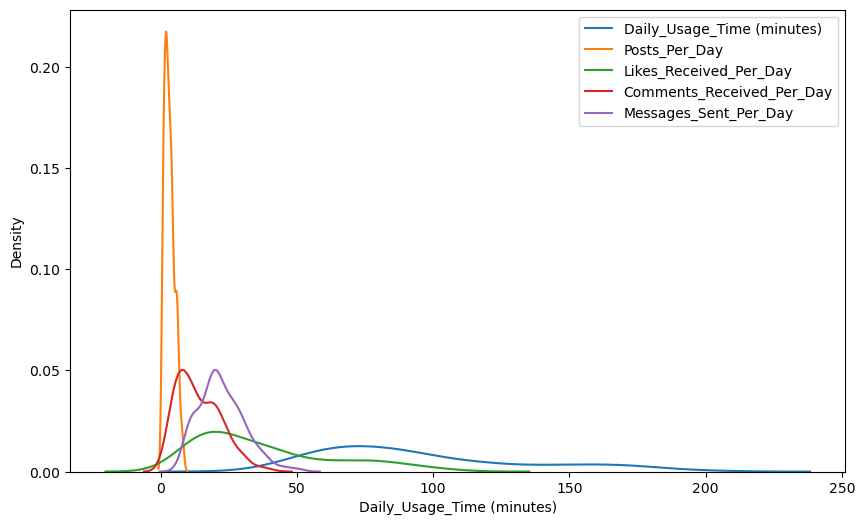

In [13]:
# density distribution plots for the numerical columns
# we can see that their are many posts per day and less time for daily usage
plt.figure(figsize=(10,6))
for col in numerical_cols:
    sns.kdeplot(traindf[col],label = col)
    
plt.legend()
plt.show()

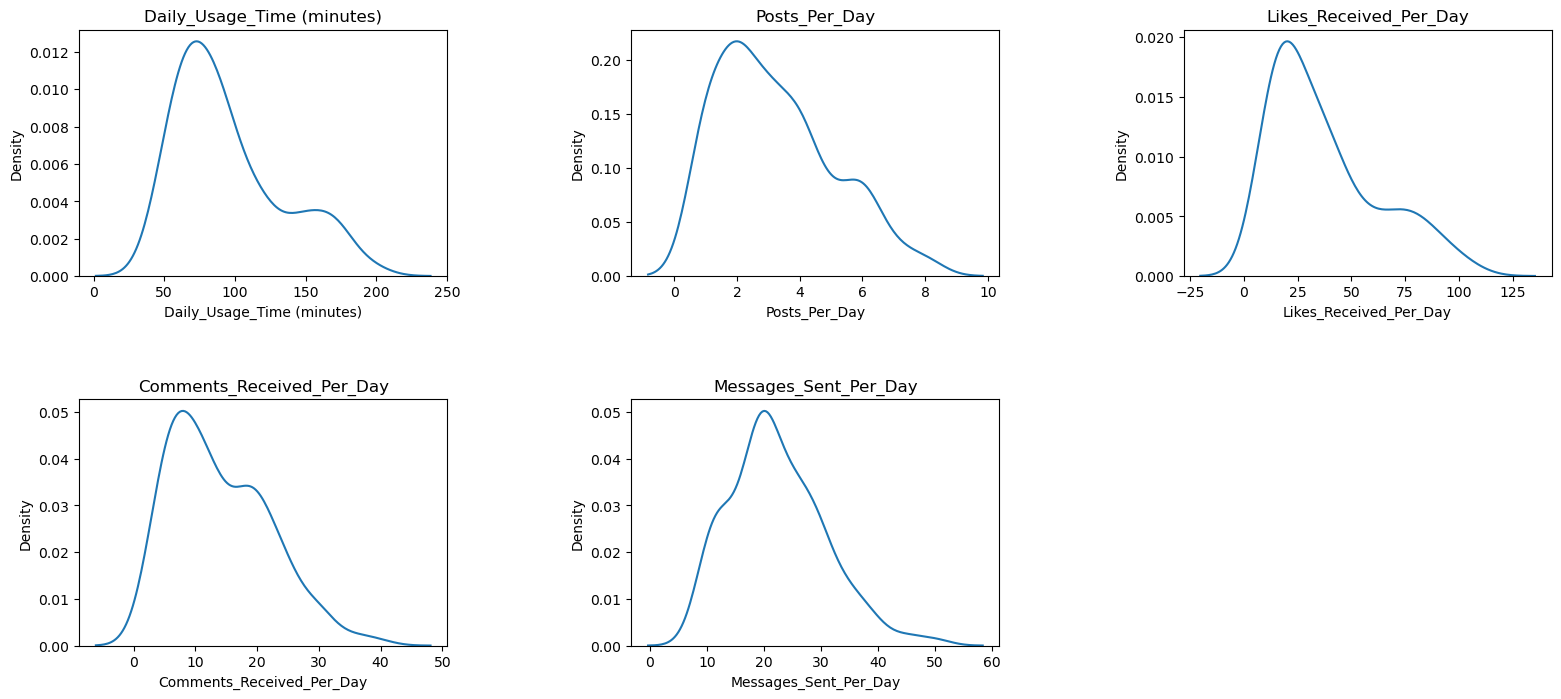

In [14]:
# distribution plot for numerical cols with each in it's own axis
plt.figure(1,figsize=(19,8))
n=0
for x in numerical_cols:
    n=n+1
    plt.subplot(2,3,n)
    plt.title(x)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.kdeplot(traindf[x])
plt.show()

In [15]:
traindf['Gender'].value_counts()

Gender
Female        74
Male          72
Non-binary    54
29             5
27             4
28             4
31             4
22             3
25             3
24             3
33             2
34             2
26             2
21             2
30             1
23             1
35             1
32             1
Name: count, dtype: int64

In [16]:
# a function to correct the 'gender' column
def clean_gender(x):
    if x == 'Female':
        return 'Female'
    if x == 'Male':
        return 'Male'
    else:
        return 'Other'

In [17]:
traindf['Gender'] = traindf['Gender'].apply(clean_gender)

In [18]:
traindf['Gender'].value_counts()

Gender
Other     92
Female    74
Male      72
Name: count, dtype: int64

In [19]:
traindf['Platform'].value_counts()

Platform
Instagram    57
Twitter      46
Facebook     44
LinkedIn     25
Whatsapp     22
Telegram     22
Snapchat     22
Name: count, dtype: int64

In [20]:
traindf['Dominant_Emotion'].value_counts()

Dominant_Emotion
Neutral      48
Happiness    47
Anxiety      41
Sadness      39
Boredom      33
Anger        30
Name: count, dtype: int64

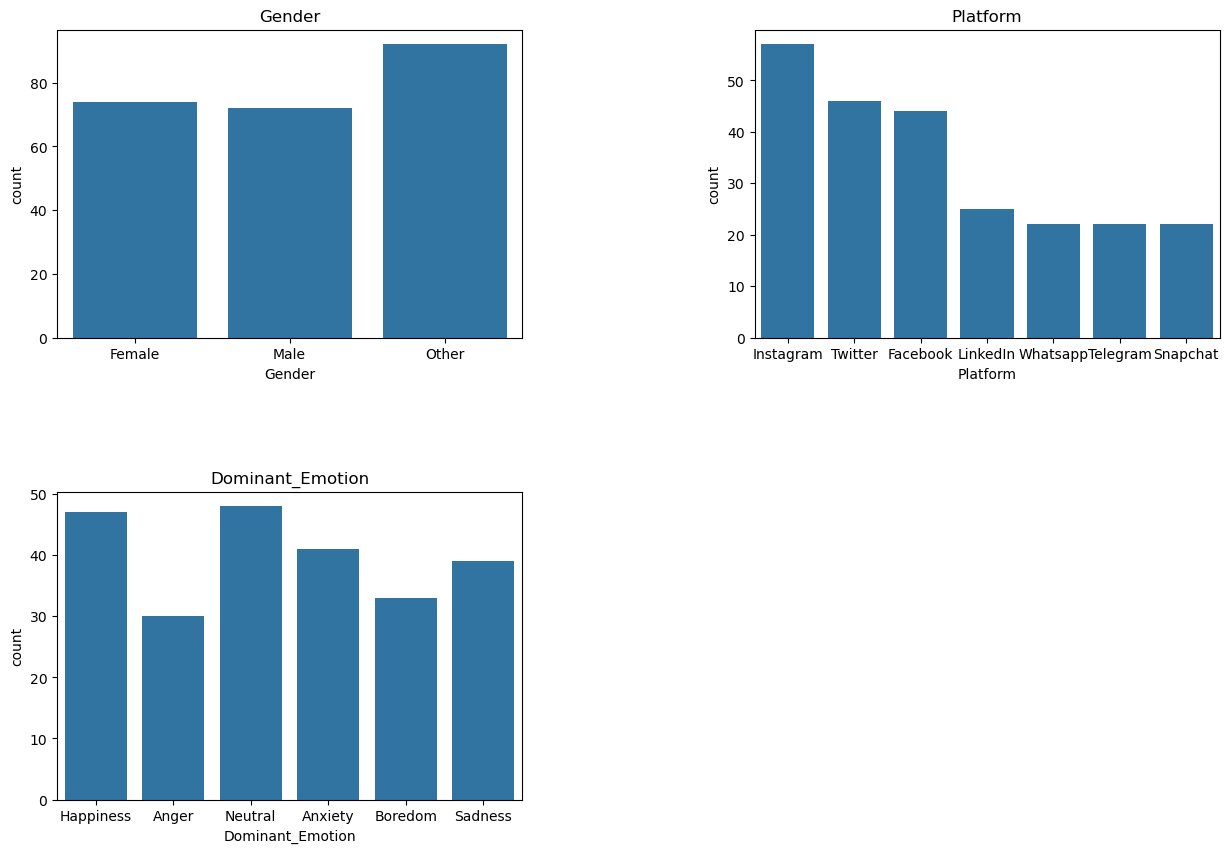

In [21]:
# countplots for categorical columns
cat_cols = ['Gender','Platform','Dominant_Emotion']
plt.figure(1,figsize=(15,10))
n=0
for col in cat_cols:
    n=n+1
    plt.subplot(2,2,n)
    plt.title(col)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.countplot(data=traindf,x=col)
plt.show()

In [22]:
group_by_gender = traindf.groupby('Gender')

<Axes: xlabel='Gender'>

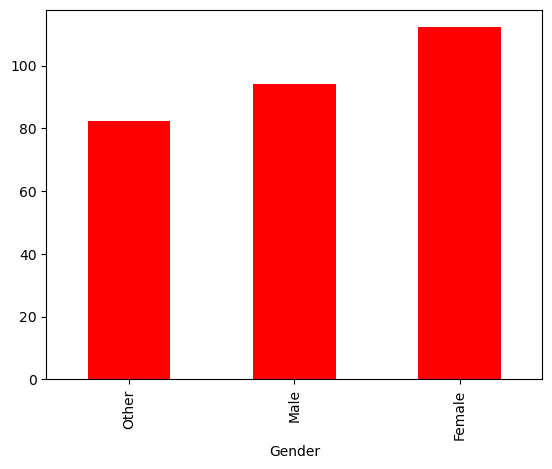

In [24]:
traindf.groupby('Gender')['Daily_Usage_Time (minutes)'].mean().sort_values().plot.bar(color='red')

In [25]:
group_by_gender.max()

,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
Gender,,,,,,,,
Female,35,Whatsapp,200.0,8.0,110.0,40.0,50.0,Sadness
Male,35,Whatsapp,175.0,7.0,100.0,35.0,40.0,Sadness
Other,Non-binary,Whatsapp,190.0,8.0,105.0,36.0,50.0,Sadness


<Axes: xlabel='Gender'>

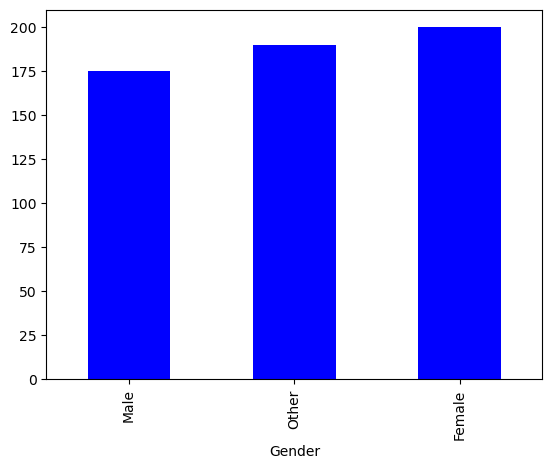

In [26]:
traindf.groupby('Gender')['Daily_Usage_Time (minutes)'].max().sort_values().plot.bar(color='blue')

In [27]:
traindf.head()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,22,Other,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [28]:
# renaming the columns
traindf.columns = ['age','gender','platform','usg/day(mins)','post/day','likesRcved/day','commentsRcved/day','msgsSent/day','emotion']

In [29]:
traindf.head()

,age,gender,platform,usg/day(mins),post/day,likesRcved/day,commentsRcved/day,msgsSent/day,emotion
0,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,22,Other,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [30]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 287
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                238 non-null    object 
 1   gender             238 non-null    object 
 2   platform           238 non-null    object 
 3   usg/day(mins)      238 non-null    float64
 4   post/day           238 non-null    float64
 5   likesRcved/day     238 non-null    float64
 6   commentsRcved/day  238 non-null    float64
 7   msgsSent/day       238 non-null    float64
 8   emotion            238 non-null    object 
dtypes: float64(5), object(4)
memory usage: 18.6+ KB


In [31]:
traindf['age'].value_counts()

age
29            20
28            20
27            20
22            16
25            14
Male          14
26            14
31            14
24            14
Female        13
21            12
33            12
Non-binary    11
30            10
23            10
34             8
35             8
32             8
Name: count, dtype: int64

In [32]:
traindf['age'] = traindf['age'].replace('Male','29')
traindf['age'] = traindf['age'].replace('Female','29')
traindf['age'] = traindf['age'].replace('Non-binary','29')

In [33]:
traindf['age'].value_counts()

age
29    58
28    20
27    20
22    16
25    14
24    14
31    14
26    14
33    12
21    12
30    10
23    10
34     8
35     8
32     8
Name: count, dtype: int64

In [34]:
# converting dtypes into a consistent dtypes
traindf['age'] = traindf['age'].astype('int64')
traindf['usg/day(mins)'] = traindf['usg/day(mins)'].astype('int64')
traindf['post/day'] = traindf['post/day'].astype('int64')
traindf['likesRcved/day'] = traindf['likesRcved/day'].astype('int64')
traindf['commentsRcved/day'] = traindf['commentsRcved/day'].astype('int64')
traindf['msgsSent/day'] = traindf['msgsSent/day'].astype('int64')

In [35]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 287
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                238 non-null    int64 
 1   gender             238 non-null    object
 2   platform           238 non-null    object
 3   usg/day(mins)      238 non-null    int64 
 4   post/day           238 non-null    int64 
 5   likesRcved/day     238 non-null    int64 
 6   commentsRcved/day  238 non-null    int64 
 7   msgsSent/day       238 non-null    int64 
 8   emotion            238 non-null    object
dtypes: int64(6), object(3)
memory usage: 18.6+ KB


#### Checking for and removing outliers

<Axes: xlabel='likesRcved/day'>

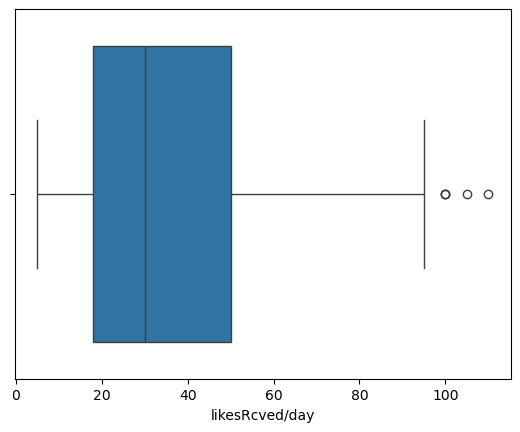

In [36]:
sns.boxplot(x=traindf['likesRcved/day'])

In [37]:
def remove_outliers_iqr_columns(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    filtered_df = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return filtered_df


columns_to_clean = ['usg/day(mins)','post/day', 'likesRcved/day', 'commentsRcved/day']
cleandf = remove_outliers_iqr_columns(traindf, columns_to_clean)

In [38]:
cleandf.shape

(232, 9)

In [39]:
cleandf.head()

,age,gender,platform,usg/day(mins),post/day,likesRcved/day,commentsRcved/day,msgsSent/day,emotion
0,25,Female,Instagram,120,3,45,10,12,Happiness
1,30,Male,Twitter,90,5,20,25,30,Anger
2,22,Other,Facebook,60,2,15,5,20,Neutral
4,33,Male,LinkedIn,45,1,5,2,10,Boredom
5,21,Male,Instagram,150,4,60,15,25,Happiness


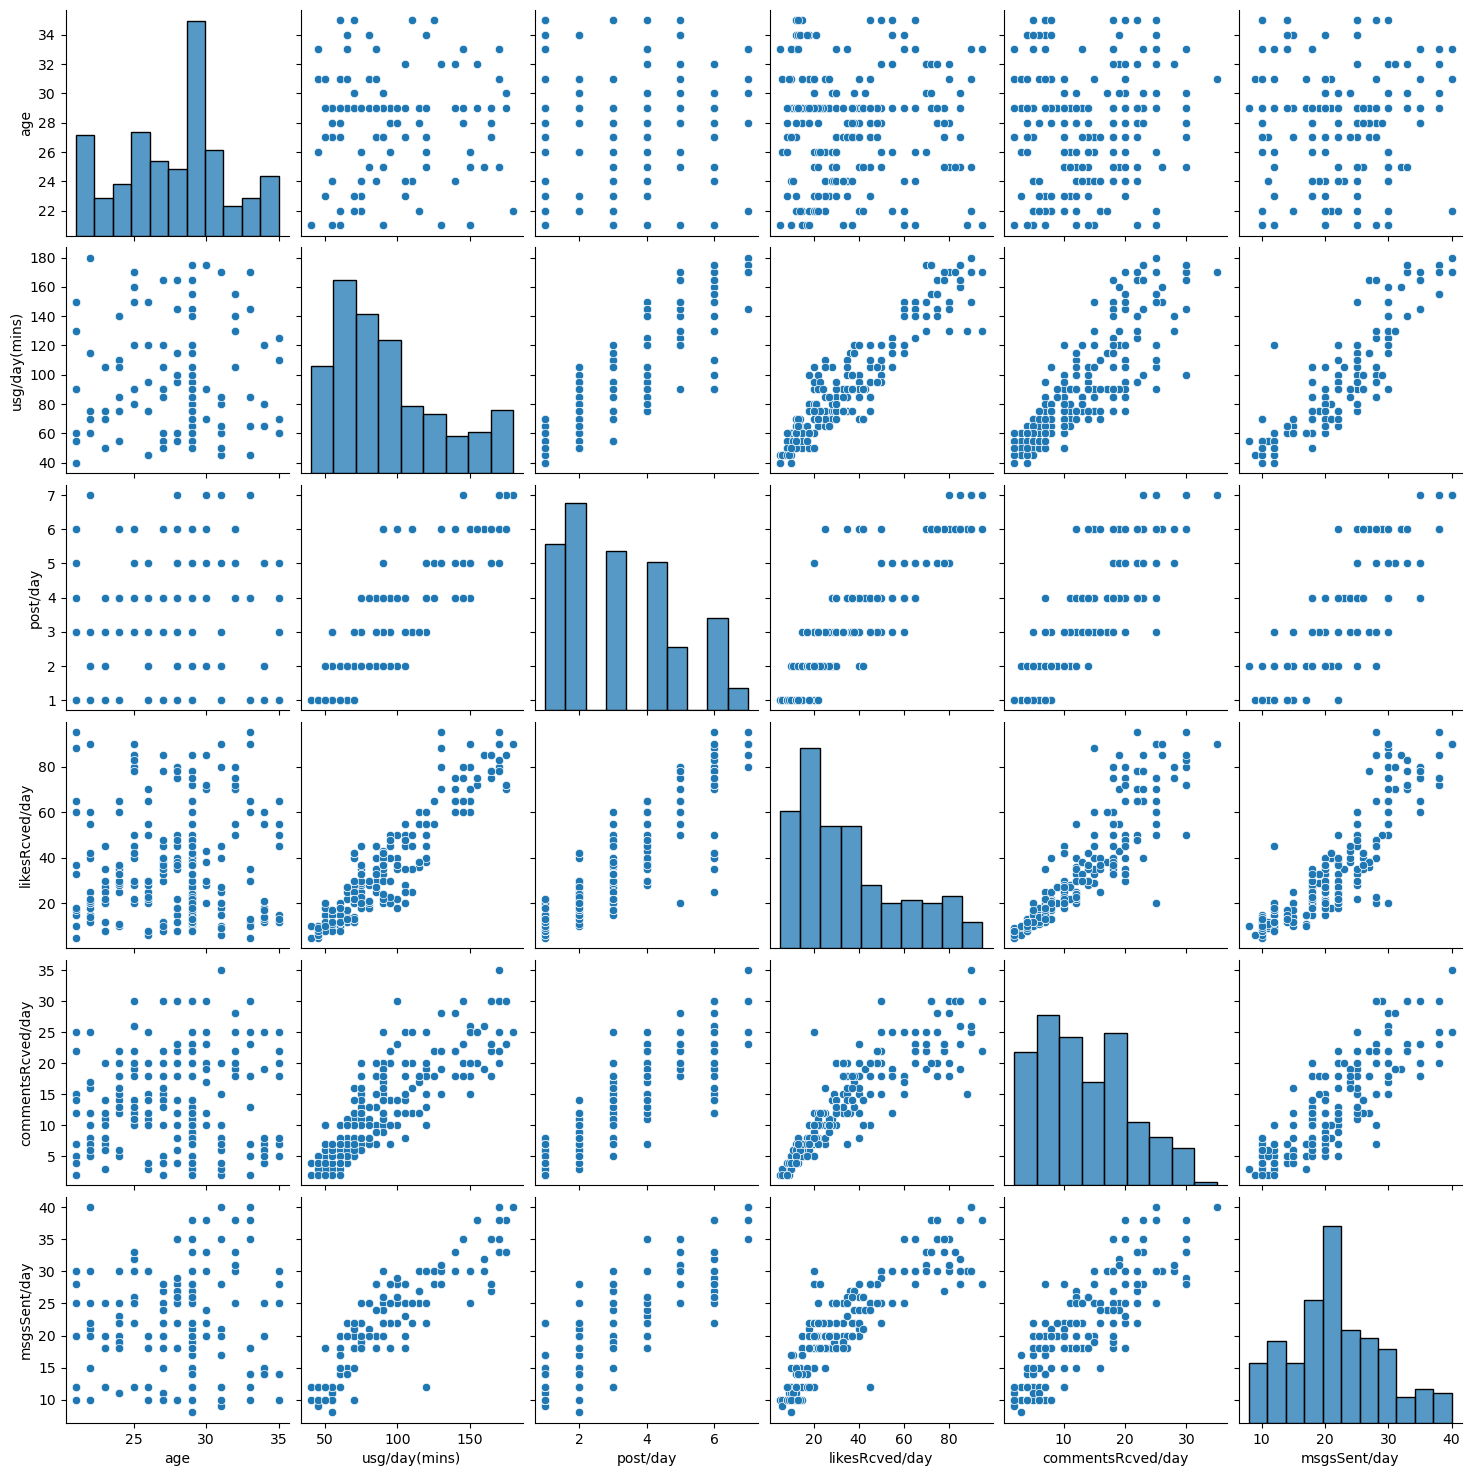

In [40]:
sns.pairplot(cleandf)

In [41]:
# converting cat cols to numerical values
cleandf['gender'] = cleandf['gender'].map({'Male':0,'Female':1,'Other':2})
cleandf['platform'] = cleandf['platform'].map({'Snapchat':0,'Telegram':1,'Whatsapp':2,'LinkedIn':3,'Facebook':4,'Twitter':5,'Instagram':6})
cleandf['emotion'] = cleandf['emotion'].map({'Anger':0,'Boredom':1,'Sadness':2,'Anxiety':3,'Happiness':4,'Neutral':5})

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [43]:
cleandf.shape

(232, 9)

In [44]:
cleandf.head()

,age,gender,platform,usg/day(mins),post/day,likesRcved/day,commentsRcved/day,msgsSent/day,emotion
0,25,1,6,120,3,45,10,12,4
1,30,0,5,90,5,20,25,30,0
2,22,2,4,60,2,15,5,20,5
4,33,0,3,45,1,5,2,10,1
5,21,0,6,150,4,60,15,25,4


In [45]:
# creating dependent and independent variables
X = cleandf.drop('emotion',axis=1)
y = cleandf['emotion']

In [46]:
# scaling the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Performing cross validation on 3 models

In [47]:
models = []
models.append(('lr',LogisticRegression()))
models.append(('rfc',RandomForestClassifier()))
models.append(('svc',SVC()))
results = dict()
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    results[name] = (cv_results.mean(),cv_results.std())
    
print('Name    results.mean    results.std')
for key,value in results.items():
    print(key,value)

Name    results.mean    results.std
lr (0.45199275362318836, 0.10171177865333098)
rfc (0.8246376811594203, 0.14136425708822087)
svc (0.5248188405797102, 0.1302183439756107)


In [48]:
# RandomForestRegressor is the best model
classifier = RandomForestClassifier()
parameters = {'n_estimators':[10,20,30],'criterion':['gini','entropy','log_loss']}
reg = GridSearchCV(classifier,parameters,cv = 5,return_train_score = False)

In [49]:
reg.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [10, 20, 30]})

In [50]:
pd.DataFrame(reg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024462,0.007774,0.003128,0.006257,gini,10,"{'criterion': 'gini', 'n_estimators': 10}",0.595745,0.872340,0.608696,0.934783,0.739130,0.750139,0.136376,9
1,0.043747,0.006258,0.003128,0.006256,gini,20,"{'criterion': 'gini', 'n_estimators': 20}",0.574468,0.787234,0.652174,0.978261,0.869565,0.772340,0.145376,7
2,0.065981,0.004894,0.006384,0.005955,gini,30,"{'criterion': 'gini', 'n_estimators': 30}",0.702128,0.808511,0.608696,0.978261,0.804348,0.780389,0.123387,5
3,0.032826,0.009441,0.001603,0.003205,entropy,10,"{'criterion': 'entropy', 'n_estimators': 10}",0.659574,0.787234,0.695652,0.913043,0.826087,0.776318,0.091023,6
4,0.052051,0.011833,0.003126,0.006251,entropy,20,"{'criterion': 'entropy', 'n_estimators': 20}",0.638298,0.808511,0.695652,0.956522,0.826087,0.785014,0.110603,4
5,0.064994,0.010030,0.003121,0.006243,entropy,30,"{'criterion': 'entropy', 'n_estimators': 30}",0.659574,0.851064,0.782609,0.978261,0.891304,0.832562,0.107183,1
6,0.028122,0.006250,0.005630,0.006965,log_loss,10,"{'criterion': 'log_loss', 'n_estimators': 10}",0.638298,0.787234,0.565217,0.978261,0.869565,0.767715,0.150225,8
7,0.045553,0.002625,0.000233,0.000467,log_loss,20,"{'criterion': 'log_loss', 'n_estimators': 20}",0.702128,0.808511,0.695652,0.978261,0.847826,0.806475,0.104302,3
8,0.080784,0.012679,0.007225,0.005125,log_loss,30,"{'criterion': 'log_loss', 'n_estimators': 30}",0.680851,0.829787,0.717391,0.956522,0.869565,0.810823,0.100658,2


#### Defining and fitting model on the trainset

In [51]:
model = RandomForestClassifier(n_estimators = 30,criterion = 'entropy')

In [52]:
model.fit(X,y)

RandomForestClassifier(criterion='entropy', n_estimators=30)

## Loading the validation data and performing the same preprocessing

In [59]:
valdata = pd.read_csv('val_social.csv', encoding='iso-8859-1')


ParserError: Error tokenizing data. C error: Expected 10 fields in line 91, saw 11


In [63]:
valdata.shape

(145, 10)

In [64]:
valdata.drop('User_ID',axis=1,inplace=True)

In [65]:
valdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         145 non-null    object
 1   Gender                      145 non-null    object
 2   Platform                    145 non-null    object
 3   Daily_Usage_Time (minutes)  145 non-null    int64 
 4   Posts_Per_Day               145 non-null    int64 
 5   Likes_Received_Per_Day      145 non-null    int64 
 6   Comments_Received_Per_Day   145 non-null    int64 
 7   Messages_Sent_Per_Day       145 non-null    object
 8   Dominant_Emotion            144 non-null    object
dtypes: int64(4), object(5)
memory usage: 10.3+ KB


In [66]:
valdata.duplicated().sum()

26

In [67]:
valdata.drop_duplicates(inplace=True)
valdata.dropna(inplace=True)

In [68]:
valdata['Gender'].value_counts()

Female        42
Non-binary    38
Male          26
24             3
33             2
34             2
28             2
22             2
26             1
Name: Gender, dtype: int64

In [69]:
valdata['Gender'] = valdata['Gender'].apply(clean_gender)

In [70]:
valdata['Gender'].value_counts()

Other     50
Female    42
Male      26
Name: Gender, dtype: int64

In [71]:
valdata['Platform'].value_counts()

Instagram    36
Facebook     23
Twitter      20
LinkedIn     15
Snapchat     13
Telegram      6
Whatsapp      5
Name: Platform, dtype: int64

In [72]:
valdata['Dominant_Emotion'].value_counts()

Happiness    26
Neutral      23
Sadness      22
Anxiety      22
Boredom      14
Anger        10
Agression     1
Name: Dominant_Emotion, dtype: int64

In [73]:
valdata = valdata[valdata['Dominant_Emotion']!='Agression']

In [74]:
valdata['Dominant_Emotion'].value_counts()

Happiness    26
Neutral      23
Sadness      22
Anxiety      22
Boredom      14
Anger        10
Name: Dominant_Emotion, dtype: int64

In [75]:
valdata['Gender'] = valdata['Gender'].map({'Male':0,'Female':1,'Other':2})
valdata['Platform'] = valdata['Platform'].map({'Snapchat':0,'Telegram':1,'Whatsapp':2,'LinkedIn':3,'Facebook':4,'Twitter':5,'Instagram':6})
valdata['Dominant_Emotion'] = valdata['Dominant_Emotion'].map({'Anger':0,'Boredom':1,'Sadness':2,'Anxiety':3,'Happiness':4,'Neutral':5})

In [76]:
valdata.columns = ['age','gender','platform','usg/day(mins)','post/day','likesRcved/day','commentsRcved/day','msgsSent/day','emotion']

In [77]:
valdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 144
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                117 non-null    object
 1   gender             117 non-null    int64 
 2   platform           117 non-null    int64 
 3   usg/day(mins)      117 non-null    int64 
 4   post/day           117 non-null    int64 
 5   likesRcved/day     117 non-null    int64 
 6   commentsRcved/day  117 non-null    int64 
 7   msgsSent/day       117 non-null    object
 8   emotion            117 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 9.1+ KB


In [78]:
valdata['age'].value_counts()

26        11
24        11
27        10
31         9
28         9
25         9
33         8
Female     8
29         7
21         7
23         6
22         6
34         5
32         4
Male       4
35         3
Name: age, dtype: int64

In [79]:
valdata['age'] = valdata['age'].replace('Male','26')
valdata['age'] = valdata['age'].replace('Female','26')

In [80]:
valdata['msgsSent/day'] = valdata['msgsSent/day'].astype('int64')
valdata['age'] = valdata['age'].astype('int64')

In [81]:
valdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 144
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                117 non-null    int64
 1   gender             117 non-null    int64
 2   platform           117 non-null    int64
 3   usg/day(mins)      117 non-null    int64
 4   post/day           117 non-null    int64
 5   likesRcved/day     117 non-null    int64
 6   commentsRcved/day  117 non-null    int64
 7   msgsSent/day       117 non-null    int64
 8   emotion            117 non-null    int64
dtypes: int64(9)
memory usage: 9.1 KB


In [82]:
X_val = valdata.drop('emotion',axis=1)
y_val = valdata['emotion']

In [83]:
X_val = scaler.transform(X_val)

In [84]:
predictions = model.predict(X_val)

In [85]:
predictions

array([4, 4, 2, 3, 1, 4, 5, 2, 2, 4, 2, 0, 1, 2, 0, 4, 5, 4, 5, 3, 3, 1,
       0, 4, 1, 4, 1, 2, 1, 1, 2, 5, 5, 5, 2, 0, 2, 5, 2, 4, 5, 3, 4, 0,
       5, 5, 2, 4, 2, 2, 3, 3, 4, 2, 2, 2, 2, 3, 2, 2, 4, 5, 5, 2, 5, 3,
       5, 4, 2, 2, 1, 2, 3, 3, 0, 2, 5, 2, 5, 4, 4, 4, 4, 3, 4, 4, 3, 5,
       2, 0, 4, 3, 2, 3, 3, 2, 1, 4, 0, 5, 5, 3, 5, 2, 5, 2, 4, 5, 3, 5,
       4, 1, 4, 4, 0, 3, 4], dtype=int64)

In [86]:
y_val.values

array([4, 4, 2, 3, 1, 4, 5, 2, 2, 4, 2, 0, 1, 2, 0, 4, 5, 4, 5, 3, 3, 1,
       0, 4, 1, 4, 1, 2, 1, 1, 3, 5, 5, 5, 4, 2, 2, 5, 2, 4, 5, 3, 4, 4,
       5, 2, 2, 1, 3, 5, 2, 3, 4, 0, 5, 2, 1, 0, 5, 3, 4, 3, 2, 2, 5, 1,
       4, 0, 4, 5, 1, 1, 3, 3, 0, 2, 5, 2, 5, 4, 4, 4, 4, 3, 4, 3, 3, 5,
       2, 0, 4, 3, 2, 3, 3, 2, 1, 4, 0, 5, 5, 3, 5, 2, 5, 0, 3, 5, 3, 3,
       4, 1, 4, 4, 2, 3, 5], dtype=int64)

In [87]:
print(accuracy_score(y_val,predictions))

0.7521367521367521


In [88]:
print(confusion_matrix(y_val,predictions))

[[ 6  0  2  1  1  0]
 [ 0 10  2  1  1  0]
 [ 2  0 17  1  0  2]
 [ 0  0  3 15  2  2]
 [ 1  0  2  0 22  1]
 [ 0  0  4  0  1 18]]


In [90]:
x = [[31,0,6,170,5,80,20,35]]
x = np.array(x)
x

array([[ 31,   0,   6, 170,   5,  80,  20,  35]])

In [91]:
model.predict(x)

array([4], dtype=int64)

In [60]:
import pickle
data = {'model':model,'scaler':scaler}
with open('socialmedia.pkl','wb') as file:
    pickle.dump(data,file)